[Table of Contents](contents.ipynb) | Previous: [Introduction](signal_processing_01.ipynb) | Next:

# Signal processing for bio-image analysts.

## Reducing Dimensionality

Images are signals with at least 2 spatial dimensions. Signals with a high number of dimensions are more difficult to explore and understand. Therefore we will sometimes reduce the number of dimensions, by only looking at a part of the whole input image. 3D images can be reduced to 2 dimensions by using projections. We can obtain a 1 dimensional signal from a 3D or 2D image by using a profile plot.

## Projection of a 3D image



In [3]:
%%groovy
%classpath add mvn com.github.twosigma ipyvolume master-SNAPSHOT
import ipyvolume.PyLab
import net.imglib2.img.display.imagej.ImageJFunctions
import net.imglib2.img.display.imagej.ImageJVirtualStack
microtubules = ij2.io().open("../data/microtubules/ground-truth.tif")
ip = ImageJFunctions.wrapFloat(microtubules, "microtubules-gt")
width = ip.getWidth()
height = ip.getHeight()
slices = ip.getImageStack().getSize()
pixels = new float[width*height*slices]
pixels = ip.getImageStack().duplicate().getVoxels(0,0,0,width,height,slices,pixels);
println(pixels.size())
println(width*height*slices)
println(width+", "+height+", "+slices)
float[][][] data = new float[slices][height][width];
for (int x = 0 ; x < width ; x++) {
    for (int y = 0 ; y < height ; y++) {
        for (int z = 0 ; z < slices ; z++) {
           data[z][y][x] = pixels[width*height*z + height*y + x].floatValue()/11817;
        }
    }
}
fg = PyLab.volShow(data)
fg.width = 300
fg.height = 200
println(fg)
PyLab.show(fg)

16777216
16777216
512, 256, 128
ipyvolume.Figure@445cae5a


null

In [7]:
%%groovy
%classpath add mvn com.github.twosigma ipyvolume master-SNAPSHOT
import ipyvolume.PyLab
import net.imglib2.img.display.imagej.ImageJFunctions
import net.imglib2.img.display.imagej.ImageJVirtualStack
microtubules = ij2.io().open("../data/microtubules/ground-truth.tif")
ip = ImageJFunctions.wrapFloat(microtubules, "microtubules-gt")
beakerx.width = ip.getWidth()
beakerx.height = ip.getHeight()
beakerx.slices = ip.getImageStack().getSize()
pixels = new float[width*height*slices]
pixels = ip.getImageStack().duplicate().getVoxels(0,0,0,width,height,slices,pixels);
println(width+", "+height+", "+slices)
beakerx.pixels = pixels
println(pixels.size())

16777216
16777216
512, 256, 128
16777216


null

In [13]:
import ipyvolume
import numpy as np
from beakerx.object import beakerx
imArray = np.array(beakerx.pixels, dtype='float')
imArray = np.reshape(imArray, (beakerx.slices, beakerx.height, beakerx.width)) 
ipyvolume.volShow(data)

ValueError: cannot reshape array of size 16777216 into shape (256,512)

In [3]:
import ipyvolume.PyLab;

int size = 32;
int radius = 12;
float[][][] data = new float[size][size][size];
for (int x = 0; x<size; x++){
    for (int y = 0; y<size; y++){
        for (int z = 0; z<size; z++){
            if (Math.pow(x - size/2, 2) + Math.pow(y - size/2, 2) + Math.pow(z - size/2, 2) <= Math.pow(radius, 2)){
                data[x][y][z] = 1.0f;
            }
        }
    }
}

figure = PyLab.volShow(data)
figure.width = 200
figure.height= 200
PyLab.show()

null

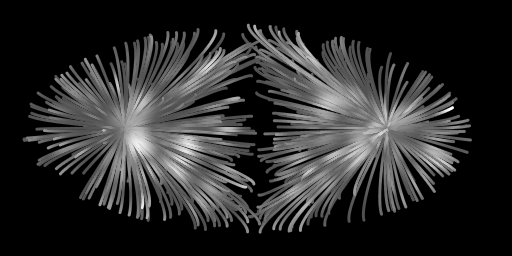

In [4]:
import net.imglib2.img.display.imagej.ImageJFunctions
import net.imagej.axis.Axes

image = ij2.io().open("../data/microtubules/ground-truth.tif")
dimX = image.dimensionIndex(Axes.X)
dimY = image.dimensionIndex(Axes.Y)
dimZ = image.dimensionIndex(Axes.Z)
projected = ij2.op().create().img(image.dimension(dimX), image.dimension(dimY))
proj_op =  ij2.op().op(net.imagej.ops.stats.IterableMax, image)
ij2.op().transform().project(projected, image, proj_op, dimZ)
output = ij2.dataset().create(projected)

ip = ImageJFunctions.wrap(output, "microtubules-gt")
ip.getProcessor().setMinAndMax(ip.getProcessor().getStatistics().min, ip.getStatistics().max)
Image(ip.getBufferedImage())

[Table of Contents](contents.ipynb) | Previous: [Introduction](signal_processing_01.ipynb) | Next:

In [1]:
%%groovy
%classpath add jar ../Fiji.app/jars/*
%classpath add jar ../Fiji.app/jars/bio-formats/*
%classpath add mvn com.github.twosigma ipyvolume master-SNAPSHOT
currentPath = System.getProperty("java.library.path")
newPath = currentPath + ":../Fiji.app/lib/linux64"
System.setProperty( "java.library.path", newPath )
import net.imagej.ImageJ
ij2 = new ImageJ()
beakerx.ij2 = ij2

Groovy started successfully



net.imagej.ImageJ@662b05c6